## Sentiment Analysis

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

from matplotlib import pyplot as plt

In [2]:
reviews = pd.read_csv('reviews.txt', header=None, names=["review"])
labels = pd.read_csv('labels.txt', header=None, names=["label"])
Y = (labels=='positive').astype(np.int_)

In [3]:
type(reviews)

pandas.core.frame.DataFrame

In [4]:
reviews.head()

,review
0,bromwell high is a cartoon comedy . it ran at ...
1,story of a man who has unnatural feelings for ...
2,homelessness or houselessness as george carli...
3,airport starts as a brand new luxury pla...
4,brilliant over acting by lesley ann warren . ...


In [5]:
Y.head()

,label
0,1
1,0
2,1
3,0
4,1


**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing. Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [6]:
train_X, test_X, train_y, test_y = train_test_split(reviews, Y, test_size=0.2, random_state=42)
test_X, val_X, test_y, val_y= train_test_split(test_X, test_y, test_size=0.25, random_state=42)

In [7]:
train_X

,review
23311,the idea of making a miniseries about the berl...
23623,mona the vagabond lives on the fringes of fren...
1020,lillian hellman one of america s most famous...
12645,let me be clear . i ve used imdb for years . ...
1533,i guess its possible that i ve seen worse mov...
...,...
21575,it is a pity that you cannot vote zero stars o...
5390,david duchovney creates a role that he was to ...
860,i m a huge fan of the dukes of hazzard tv sho...
15795,turkish cinema has a big problem . directors a...


In [8]:
train_y

,label
23311,0
23623,0
1020,1
12645,0
1533,0
...,...
21575,0
5390,1
860,1
15795,0


In [9]:
max_tokens = 10000

#Count vectorizer converts text documents to a matrix of token counts
vectorizer = CountVectorizer(max_features=max_tokens)

## Also look into min_df and max_df ##

train_features = vectorizer.fit_transform(train_X["review"]).toarray()
val_features = vectorizer.transform(val_X["review"]).toarray()
test_features = vectorizer.transform(test_X["review"]).toarray()

**(b)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

In [10]:
# Showing the concepts

texts = ["Food was good.", "Food tastes usually good.", "Overall restaurant is good."]

simple_vectorizer = CountVectorizer()
X_texts = simple_vectorizer.fit_transform(texts)
X_array = X_texts.toarray()

# Print words in the vocabulary
print("Vocabulary:", simple_vectorizer.get_feature_names_out())

# Print the transformed features (word counts for each document)
print("Features: \n", X_array)

Vocabulary: ['food' 'good' 'is' 'overall' 'restaurant' 'tastes' 'usually' 'was']
Features: 
 [[1 1 0 0 0 0 0 1]
 [1 1 0 0 0 1 1 0]
 [0 1 1 1 1 0 0 0]]


In [11]:
# Word represntation

simple_vectorizer.transform(["food"]).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0]])

In [12]:
# Sentence representation

simple_vectorizer.transform(["Food was good."]).toarray()

array([[1, 1, 0, 0, 0, 0, 0, 1]])

**(c)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

**(d)** Test your sentiment-classifier on the test set.

**(e)** Use the classifier to classify a few sentences you write yourselves. 

In [13]:
model = Sequential()
model.add(Dense(128, input_shape=(train_features.shape[1],), activation='relu',  kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Add dropout with a rate of 0.5
model.add(Dense(1, activation='sigmoid'))

2023-11-16 11:52:32.475249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 11:52:32.484076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-16 11:52:32.484303: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280257 (4.88 MB)
Trainable params: 1280257 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history = model.fit(train_features, train_y["label"], epochs=5, batch_size=16, validation_data=(val_features, val_y["label"]))

2023-11-16 11:52:33.501499: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1600000000 exceeds 10% of free system memory.
2023-11-16 11:52:35.401573: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1600000000 exceeds 10% of free system memory.


Epoch 1/5


2023-11-16 11:52:37.479091: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f154fd20370 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-16 11:52:37.479165: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-11-16 11:52:37.484684: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-16 11:52:37.500826: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2023-11-16 11:52:37.629926: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 [==============================] - 7s 4ms/step - loss: 0.7396 - accuracy: 0.8076 - val_loss: 0.6967 - val_accuracy: 0.8200
Epoch 2/5
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7061 - accuracy: 0.8234 - val_loss: 0.7063 - val_accuracy: 0.8120
Epoch 3/5
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6983 - accuracy: 0.8241 - val_loss: 0.6602 - val_accuracy: 0.8432
Epoch 4/5
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6924 - accuracy: 0.8237 - val_loss: 0.6697 - val_accuracy: 0.8408
Epoch 5/5
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6792 - accuracy: 0.8282 - val_loss: 0.6609 - val_accuracy: 0.8376


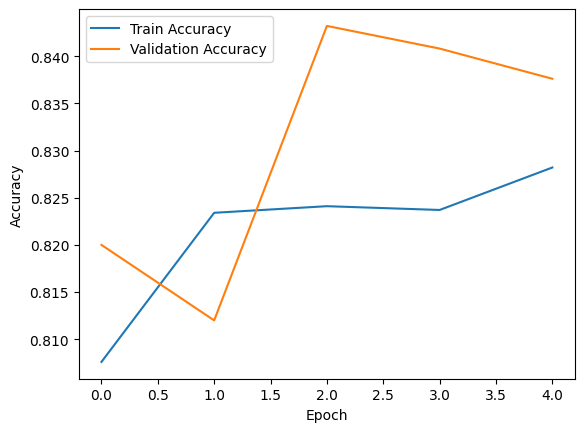

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

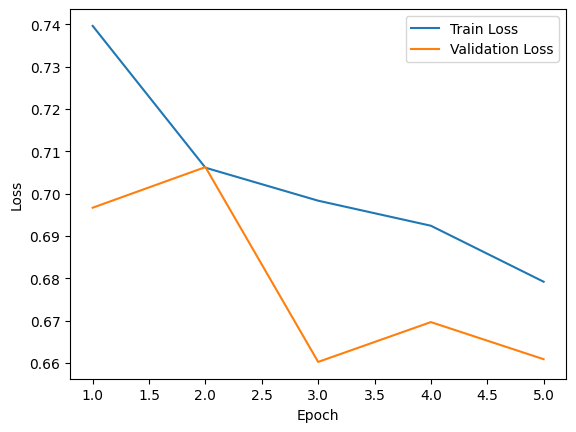

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training loss and validation loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_features, test_y)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

118/118 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.8699
Test Accuracy: 86.99%
